<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#My-sample-from-dataset_train.parquet" data-toc-modified-id="My-sample-from-dataset_train.parquet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>My sample from dataset_train.parquet</a></span></li><li><span><a href="#-Learning-CatBoost-Models-" data-toc-modified-id="-Learning-CatBoost-Models--3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Learning CatBoost Models </a></span></li><li><span><a href="#List-of-true-features" data-toc-modified-id="List-of-true-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>List of true features</a></span></li></ul></div>

In [3]:
# Импортируем библиотеки
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

RANDOM_STATE = 180723
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,\
recall_score, roc_curve, RocCurveDisplay, f1_score, roc_auc_score, r2_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
pip install pyarrow

In [18]:
pip install fastparquet

     -------------------------------------- 715.2/715.2 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<h2>Load data</h2>

In [4]:
#import json
with open('features_types.json') as f:
    data = json.load(f)
print(data)

{'markers_0_1_cnt': 'numeric', 'markers_1_1_cnt': 'numeric', 'markers_2_1_cnt': 'numeric', 'markers_3_1_cnt': 'numeric', 'markers_4_1_cnt': 'numeric', 'markers_5_1_cnt': 'numeric', 'markers_6_1_cnt': 'numeric', 'markers_7_1_cnt': 'numeric', 'markers_8_1_cnt': 'numeric', 'markers_9_1_cnt': 'numeric', 'markers_10_1_cnt': 'numeric', 'markers_11_1_cnt': 'numeric', 'markers_12_1_cnt': 'numeric', 'markers_13_1_cnt': 'numeric', 'markers_14_1_cnt': 'numeric', 'markers_15_1_cnt': 'numeric', 'markers_16_1_cnt': 'numeric', 'markers_17_1_cnt': 'numeric', 'markers_18_1_cnt': 'numeric', 'markers_19_1_cnt': 'numeric', 'markers_20_1_cnt': 'numeric', 'markers_21_1_cnt': 'numeric', 'markers_22_1_cnt': 'numeric', 'markers_23_1_cnt': 'numeric', 'markers_24_1_cnt': 'numeric', 'markers_25_1_cnt': 'numeric', 'markers_26_1_cnt': 'numeric', 'markers_27_1_cnt': 'numeric', 'markers_28_1_cnt': 'numeric', 'markers_29_1_cnt': 'numeric', 'markers_30_1_cnt': 'numeric', 'markers_31_1_cnt': 'numeric', 'markers_32_1_cnt

In [3]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [5]:
# Table with name of fields
df1=pd.DataFrame.from_dict(data,orient='index')
df = df1.index
print(df1)

                         0
markers_0_1_cnt    numeric
markers_1_1_cnt    numeric
markers_2_1_cnt    numeric
markers_3_1_cnt    numeric
markers_4_1_cnt    numeric
...                    ...
markers_941_1_cnt  numeric
markers_942_1_cnt  numeric
markers_943_1_cnt  numeric
markers_944_1_cnt  numeric
markers_945_1_cnt  numeric

[2776 rows x 1 columns]


In [6]:
# Fields only markers
a = df[:784].tolist()
b = df[2636:].tolist()
c = ['target']
markers = [a + b + c][0]

In [7]:
# Looking markers name
markers

['markers_0_1_cnt',
 'markers_1_1_cnt',
 'markers_2_1_cnt',
 'markers_3_1_cnt',
 'markers_4_1_cnt',
 'markers_5_1_cnt',
 'markers_6_1_cnt',
 'markers_7_1_cnt',
 'markers_8_1_cnt',
 'markers_9_1_cnt',
 'markers_10_1_cnt',
 'markers_11_1_cnt',
 'markers_12_1_cnt',
 'markers_13_1_cnt',
 'markers_14_1_cnt',
 'markers_15_1_cnt',
 'markers_16_1_cnt',
 'markers_17_1_cnt',
 'markers_18_1_cnt',
 'markers_19_1_cnt',
 'markers_20_1_cnt',
 'markers_21_1_cnt',
 'markers_22_1_cnt',
 'markers_23_1_cnt',
 'markers_24_1_cnt',
 'markers_25_1_cnt',
 'markers_26_1_cnt',
 'markers_27_1_cnt',
 'markers_28_1_cnt',
 'markers_29_1_cnt',
 'markers_30_1_cnt',
 'markers_31_1_cnt',
 'markers_32_1_cnt',
 'markers_33_1_cnt',
 'markers_34_1_cnt',
 'markers_35_1_cnt',
 'markers_36_1_cnt',
 'markers_37_1_cnt',
 'markers_38_1_cnt',
 'markers_39_1_cnt',
 'markers_40_1_cnt',
 'markers_41_1_cnt',
 'markers_42_1_cnt',
 'markers_43_1_cnt',
 'markers_44_1_cnt',
 'markers_45_1_cnt',
 'markers_46_1_cnt',
 'markers_47_1_cnt',
 '

In [8]:
# Load markers Data set
sel = [("target", ">", 0)]
df_1 = pd.read_parquet('dataset_train.parquet', engine='fastparquet', columns=markers)


In [9]:
# See info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702086 entries, 0 to 702085
Columns: 925 entries, markers_0_1_cnt to target
dtypes: float64(924), int32(1)
memory usage: 4.8 GB


In [10]:
# See first 5 rows 
df_1.head(5)

markers_0_1_cnt  markers_1_1_cnt  markers_2_1_cnt  markers_3_1_cnt  \
0        -0.149534        -0.096585        -0.400870        -0.362458   
1        -0.149534        -0.096585         0.196468        -0.362458   
2        -0.149534        -0.096585        -0.102201         0.911996   
3        -0.149534        -0.096585        -0.400870        -0.362458   
4        -0.149534        -0.096585         0.196468        -0.362458   

   markers_4_1_cnt  markers_5_1_cnt  markers_6_1_cnt  markers_7_1_cnt  \
0         0.302917        -0.324892        -0.046691        -0.554345   
1         0.092276        -0.324892        -0.046691        -0.554345   
2         0.724200         0.445189        -0.046691        -0.397624   
3         1.145482        -0.324892        -0.046691        -0.554345   
4         0.934841        -0.324892        -0.046691         0.072541   

   markers_8_1_cnt  markers_9_1_cnt  ...  markers_937_1_cnt  \
0        -0.016534         -0.05408  ...          -0.198278   
1        -0.016534         -0.05408  ...          -0.198278   
2        -0.016534         -0.05408  ...          -0.198278   
3        -0.016534         -0.05408  ...           0.227283   
4        -0.016534         -0.05408  ...          -0.198278   

   markers_938_1_cnt  markers_939_1_cnt  markers_940_1_cnt  markers_941_1_cnt  \
0          -0.203579          -0.021226          -0.131766           -0.05907   
1          -0.203579          -0.021226          -0.131766           -0.05907   
2           0.691969          -0.021226          -0.131766           -0.05907   
3          -0.203579          -0.021226          -0.131766           -0.05907   
4          -0.203579          -0.021226          25.247005           -0.05907   

   markers_942_1_cnt  markers_943_1_cnt  markers_944_1_cnt  markers_945_1_cnt  \
0          -0.037447          -0.241147          -0.118010          -0.486011   
1          -0.037447          -0.241147          -0.118010          -0.486011   
2          -0.037447          -0.241147          -0.118010          -0.486011   
3          -0.037447           3.518185           1.084476           1.688183   
4          -0.037447          -0.241147          -0.118010           0.601086   

   target  
0       0  
1       0  
2       1  
3       0  
4       0  

[5 rows x 925 columns]

In [11]:
# Make corr function
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [12]:
# Doing small sample
df_train, df_test = train_test_split(df_1, test_size=0.01, random_state=42)

In [11]:
# Watching corr
corrFilter(df_test, .9)

markers_285_1_cnt  markers_890_1_cnt    0.908731
markers_905_1_cnt  markers_146_1_cnt    0.924316
markers_716_1_cnt  markers_191_1_cnt    0.946781
markers_535_1_cnt  markers_533_1_cnt    0.969975
markers_22_1_cnt   markers_23_1_cnt     0.979875
markers_800_1_cnt  markers_360_1_cnt    0.979999
markers_43_1_cnt   markers_865_1_cnt    0.987713
markers_590_1_cnt  markers_109_1_cnt    0.987724
markers_27_1_cnt   markers_840_1_cnt    0.990418
markers_828_1_cnt  markers_19_1_cnt     0.991242
markers_79_1_cnt   markers_812_1_cnt    0.993028
markers_0_1_cnt    markers_0_1_cnt           NaN
dtype: float64

In [13]:
# Doing little bit bigger sample
df_train, df_test2 = train_test_split(df_1, test_size=0.1, random_state=42)

In [14]:
# Watching corr
corrFilter(df_test2, .9)

markers_754_1_cnt  markers_728_1_cnt    0.915111
markers_146_1_cnt  markers_905_1_cnt    0.929171
markers_939_1_cnt  markers_58_1_cnt     0.929968
markers_797_1_cnt  markers_775_1_cnt    0.947154
markers_590_1_cnt  markers_109_1_cnt    0.956665
markers_535_1_cnt  markers_533_1_cnt    0.972336
markers_43_1_cnt   markers_865_1_cnt    0.980377
markers_23_1_cnt   markers_22_1_cnt     0.983476
markers_27_1_cnt   markers_840_1_cnt    0.984651
markers_828_1_cnt  markers_19_1_cnt     0.993109
markers_79_1_cnt   markers_812_1_cnt    0.997403
markers_0_1_cnt    markers_0_1_cnt           NaN
dtype: float64

In [ ]:
# Doing list with all name of fields
a = df.tolist()
b = ['target']
all = [a + b][0]
new_list = [all for all in all if all not in markers]

In [ ]:
df_all = pd.read_parquet('dataset_train.parquet', engine='fastparquet', columns=new_list)

In [ ]:
new_list

<h2>My sample from dataset_train.parquet</h2>

In [15]:
# Сформируем списко признаков
b = df[1800:].tolist()
a = ['channel_name','target']
c = ['save_team_answers_1_1_cnt',
 'save_team_answers_3_1_cnt',
 'save_team_answers_5_1_cnt',
 'save_team_answers_7_1_cnt',
 'save_team_answers_9_1_cnt',
 'save_team_answers_11_1_cnt',
 'save_team_answers_13_1_cnt',
 'save_team_answers_15_1_cnt',
 'save_team_answers_17_1_cnt',
 'save_team_answers_18_1_avg',
 'save_team_answers_19_1_cnt',
 'save_team_answers_21_1_cnt',
 'save_team_answers_23_1_cnt',
 'save_team_answers_25_1_cnt',
 'save_team_answers_27_1_cnt',
 'save_team_answers_29_1_cnt',
 'save_team_answers_31_1_cnt',
 'save_team_answers_33_1_cnt',
 'save_team_answers_35_1_cnt',
 'save_team_answers_37_1_cnt',
 'save_team_answers_39_1_cnt']
features_3 = [a + b][0]
features_3 = [features_3 for features_3 in features_3 if features_3 not in c]

In [16]:
# Выведем
features_3

['channel_name',
 'target',
 'spas_symptoms_agr_233_6_avg',
 'spas_symptoms_agr_234_6_std',
 'spas_symptoms_agr_235_6_sum',
 'issues_0_1_sum',
 'issues_1_3_sum',
 'issues_2_6_sum',
 'issues_3_1_sum',
 'issues_4_3_sum',
 'issues_5_6_sum',
 'issues_6_1_sum',
 'issues_7_3_sum',
 'issues_8_6_sum',
 'issues_9_1_sum',
 'issues_10_3_sum',
 'issues_11_6_sum',
 'issues_12_1_sum',
 'issues_13_3_sum',
 'issues_14_6_sum',
 'issues_15_1_sum',
 'issues_16_3_sum',
 'issues_17_6_sum',
 'issues_18_1_sum',
 'issues_19_3_sum',
 'issues_20_6_sum',
 'issues_21_1_sum',
 'issues_22_3_sum',
 'issues_23_6_sum',
 'issues_24_1_sum',
 'issues_25_3_sum',
 'issues_26_6_sum',
 'issues_27_1_sum',
 'issues_28_3_sum',
 'issues_29_6_sum',
 'issues_30_1_sum',
 'issues_31_3_sum',
 'issues_32_6_sum',
 'issues_33_1_sum',
 'issues_34_3_sum',
 'issues_35_6_sum',
 'issues_36_1_sum',
 'issues_37_3_sum',
 'issues_38_6_sum',
 'issues_39_1_sum',
 'issues_40_3_sum',
 'issues_41_6_sum',
 'issues_42_1_sum',
 'issues_43_3_sum',
 'issu

In [17]:
# Загрузим признаки
df_features = pd.read_parquet('dataset_train.parquet', engine='fastparquet', columns=features_3)

In [18]:
# Посмотрим общую информацию
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702086 entries, 0 to 702085
Columns: 957 entries, channel_name to markers_945_1_cnt
dtypes: float64(876), int32(56), int64(18), int8(6), object(1)
memory usage: 4.8+ GB


In [19]:
# Посмотрим на дисбаланс классов
df_features['target'].value_counts()

0    696617
1      5469
Name: target, dtype: int64

In [20]:
#Сделаю выборку c 1
df_ones = df_features.loc[df_features['target']  != 0]

In [21]:
# Watching 10 sample rows
df_features.sample(10)

channel_name  target  spas_symptoms_agr_233_6_avg  \
306332            1       0                    -0.125866   
58013             3       0                    -0.125866   
530582            3       0                    -0.125866   
447959            5       0                    -0.125866   
427401            5       0                    -0.125866   
311954            4       0                    -0.125866   
53345             5       0                    -0.125866   
437130            3       0                    -0.125866   
475288            4       0                    -0.125866   
24472             1       0                    -0.125866   

        spas_symptoms_agr_234_6_std  spas_symptoms_agr_235_6_sum  \
306332                    -0.125118                    -0.125834   
58013                     -0.125118                    -0.125834   
530582                    -0.125118                    -0.125834   
447959                    -0.125118                    -0.125834   
427401                    -0.125118                    -0.125834   
311954                    -0.125118                    -0.125834   
53345                     -0.125118                    -0.125834   
437130                    -0.125118                    -0.125834   
475288                    -0.125118                    -0.125834   
24472                     -0.125118                    -0.125834   

        issues_0_1_sum  issues_1_3_sum  issues_2_6_sum  issues_3_1_sum  \
306332             NaN             NaN             NaN             NaN   
58013        -0.102435       -0.192616       -0.251135       -0.115958   
530582       -0.102435       -0.192616       -0.251135       -0.115958   
447959       -0.102435       -0.192616       -0.251135       -0.115958   
427401             NaN             NaN             NaN             NaN   
311954             NaN             NaN             NaN             NaN   
53345              NaN             NaN             NaN             NaN   
437130       -0.102435       -0.192616       -0.251135       -0.115958   
475288             NaN             NaN             NaN             NaN   
24472        -0.102435       -0.192616       -0.251135       -0.115958   

        issues_4_3_sum  ...  markers_936_1_cnt  markers_937_1_cnt  \
306332             NaN  ...          -0.245197          -0.198278   
58013        -0.231892  ...          -0.245197          -0.198278   
530582       -0.231892  ...          -0.245197          -0.198278   
447959       -0.231892  ...          -0.245197          -0.198278   
427401             NaN  ...          -0.245197          -0.198278   
311954             NaN  ...           3.328592          -0.198278   
53345              NaN  ...          -0.245197          -0.198278   
437130       -0.231892  ...          -0.245197          -0.198278   
475288             NaN  ...          -0.006945          -0.198278   
24472        -0.231892  ...          -0.245197          -0.198278   

        markers_938_1_cnt  markers_939_1_cnt  markers_940_1_cnt  \
306332          -0.203579          -0.021226          -0.131766   
58013           -0.203579          -0.021226          -0.131766   
530582          -0.203579          -0.021226          -0.131766   
447959          -0.203579          -0.021226          -0.131766   
427401          -0.203579          -0.021226          -0.131766   
311954          -0.203579          -0.021226          -0.131766   
53345           -0.203579          -0.021226          -0.131766   
437130           0.691969          -0.021226          -0.131766   
475288          -0.203579          -0.021226          -0.131766   
24472           -0.203579          -0.021226          -0.131766   

        markers_941_1_cnt  markers_942_1_cnt  markers_943_1_cnt  \
306332           -0.05907          -0.037447          -0.241147   
58013            -0.05907          -0.037447          -0.241147   
530582           -0.05907          -0.037447           1.011964   
447959          

In [22]:
# Watching 10 sample rows from data with target 1
df_ones.sample(10)

channel_name  target  spas_symptoms_agr_233_6_avg  \
583547            3       1                    -0.125866   
427468            4       1                    -0.125866   
500311            5       1                    -0.125866   
616054            5       1                    -0.125866   
698008            5       1                    -0.125866   
83458             3       1                    -0.125866   
102236            3       1                    -0.125866   
499851            3       1                    -0.125866   
581390            3       1                    -0.125866   
626632            5       1                    -0.125866   

        spas_symptoms_agr_234_6_std  spas_symptoms_agr_235_6_sum  \
583547                    -0.125118                    -0.125834   
427468                    -0.125118                    -0.125834   
500311                    -0.125118                    -0.125834   
616054                    -0.125118                    -0.125834   
698008                    -0.125118                    -0.125834   
83458                     -0.125118                    -0.125834   
102236                    -0.125118                    -0.125834   
499851                    -0.125118                    -0.125834   
581390                    -0.125118                    -0.125834   
626632                    -0.125118                    -0.125834   

        issues_0_1_sum  issues_1_3_sum  issues_2_6_sum  issues_3_1_sum  \
583547       -0.102435       -0.192616       -0.251135       -0.115958   
427468             NaN             NaN             NaN             NaN   
500311             NaN             NaN             NaN             NaN   
616054       -0.102435       -0.192616       -0.251135       -0.115958   
698008       -0.102435       -0.192616       -0.251135       -0.115958   
83458              NaN             NaN             NaN             NaN   
102236             NaN             NaN             NaN             NaN   
499851       -0.102435       -0.192616       -0.251135       -0.115958   
581390             NaN             NaN             NaN             NaN   
626632       -0.102435       -0.192616       -0.251135       -0.115958   

        issues_4_3_sum  ...  markers_936_1_cnt  markers_937_1_cnt  \
583547       -0.231892  ...          -0.245197          -0.198278   
427468             NaN  ...           2.613834          -0.198278   
500311             NaN  ...          -0.245197          -0.198278   
616054       -0.231892  ...          -0.245197          -0.198278   
698008       -0.231892  ...          -0.245197          -0.198278   
83458              NaN  ...          -0.245197          -0.198278   
102236             NaN  ...          -0.245197          -0.198278   
499851       -0.231892  ...          -0.245197          -0.198278   
581390             NaN  ...          -0.245197          -0.198278   
626632       -0.231892  ...          -0.006945           0.227283   

        markers_938_1_cnt  markers_939_1_cnt  markers_940_1_cnt  \
583547          -0.203579          -0.021226          -0.131766   
427468          -0.203579          -0.021226          -0.131766   
500311          -0.203579          -0.021226          -0.131766   
616054          -0.203579          -0.021226          -0.131766   
698008          -0.203579          -0.021226          -0.131766   
83458           -0.203579          -0.021226          -0.131766   
102236          -0.203579          -0.021226          -0.131766   
499851          -0.203579          -0.021226          -0.131766   
581390           1.139742          -0.021226          -0.131766   
626632          -0.203579          -0.021226          -0.131766   

        markers_941_1_cnt  markers_942_1_cnt  markers_943_1_cnt  \
583547                NaN                NaN           0.385408   
427468           -0.05907          -0.037447           0.385408   
500311           -0.05907          -0.037447          -0.241147   
616054          

In [23]:
# Interesting feature, watching value counts
df_ones['channel_name'].value_counts()

3    3372
5     931
4     627
1     518
2      21
Name: channel_name, dtype: int64

In [24]:
df_ones['area_1_0_ctg'].value_counts()

3    3094
0    1689
2     599
1      87
Name: area_1_0_ctg, dtype: int64

In [25]:
df_features['area_1_0_ctg'].value_counts()

3    371682
0    234719
2     85057
1     10628
Name: area_1_0_ctg, dtype: int64

In [26]:
# Interesting feature, watching value counts
df_features['channel_name'].value_counts()

5    221058
3    209022
4    135852
1    131566
2      4588
Name: channel_name, dtype: int64

In [51]:
# Watching Nan cells
df_ones.isnull().sum().sort_values(ascending=False)

campaigns_266_3_part                   5469
campaigns_263_1_sum                    5469
campaigns_264_1_part                   5469
campaigns_265_1_sum                    5469
campaigns_267_6_part                   5469
campaigns_268_1_part                   5469
campaigns_269_1_sum                    5469
campaigns_270_3_part                   5469
campaigns_271_6_part                   5469
campaigns_272_1_part                   5469
campaigns_273_1_sum                    5469
campaigns_274_3_part                   5469
campaigns_275_6_part                   5469
domru_site_215_1_cnt                   5417
user_active_22_0_dt                    5394
online_cinema_213_1_cnt                5290
online_cinema_224_1_cnt                5247
domru_site_205_1_cnt                   5207
online_cinema_201_1_cnt                5188
autopay_2_0_cnt                        5179
user_active_27_0_dt                    5123
materials_details_16_1_ctg             5116
autopay_5_0_dt                  

In [27]:
# Doing small sample 
df_train, df_test3 = train_test_split(df_1, test_size=0.1, random_state=42)

In [28]:
# Watching corr
corrFilter(df_ones, .8)

C:\Users\ipd08\AppData\Local\Temp\ipykernel_2788\4091492017.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  xCorr = x.corr()


movix_app_visits_2_1_cnt      spas_symptoms_agr_287_1_avg   -0.998593
spas_symptoms_agr_284_12_avg  movix_app_visits_2_1_cnt      -0.898939
spas_symptoms_agr_286_12_sum  movix_app_visits_2_1_cnt      -0.870225
spas_symptoms_agr_249_12_std  spas_symptoms_agr_252_1_std    0.800240
user_active_19_1_flg          user_active_12_1_flg           0.800246
                                                               ...   
campaigns_53_1_sum            campaigns_57_1_sum             1.000000
campaigns_174_1_sum           campaigns_182_1_sum            1.000000
campaigns_195_1_sum           campaigns_194_1_part           1.000000
                              campaigns_197_6_part           1.000000
target                        target                              NaN
Length: 374, dtype: float64

In [29]:
# Dooing downsample function
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [30]:
# Doing function for marking cat_features
cat = ['ctg', 'flg','channel_name','src_id']
def cat_columns(columns, cat):
    cat_columns = []
    for col in columns:
        for c in cat:
            if c in col:
                cat_columns.append(col)
    return cat_columns

In [31]:
# Marking cat_features
cat_features = cat_columns(df_features, cat)
df_features[cat_features] = df_features[cat_features].astype('category')

In [32]:
len(cat_features)

81

In [33]:
# Watching results of cat_columns work
df_features[cat_features].head()

channel_name communication_availability_46_1_flg  \
0            5                                   0   
1            5                                   0   
2            5                                   0   
3            3                                   0   
4            1                                   0   

  communication_availability_47_1_flg communication_availability_48_1_flg  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

  communication_availability_49_1_flg communication_availability_50_1_flg  \
0                                   1                                   1   
1                                   1                                   1   
2                                   1                                   1   
3                                   1                                   1   
4                                   1                                   1   

  user_active_5_1_flg deact_react_12_1_ctg exist_tariff_2_1_flg  \
0                   1                    0                    0   
1                   1                    0                    0   
2                   1                    0                    0   
3                   1                    0                    0   
4                   1                    0                    0   

  deact_react_13_1_ctg  ... social_dem_1_0_flg social_dem_2_0_flg  \
0                   -1  ...                 -1                 -1   
1                   -1  ...                 -1                 -1   
2                   -1  ...                  1                  0   
3                   -1  ...                  1                  0   
4                   -1  ...                  1                  0   

  social_dem_3_0_flg social_dem_4_0_flg cities_2_0_ctg user_active_35_1_flg  \
0                 -1                 -1             52                    1   
1                 -1                 -1             52                    0   
2                  0                  0             52                    0   
3                  0                  1             52                    0   
4                  0                  1             52                    0   

  communication_availability_68_1_ctg tariff_plans_25_1_ctg  \
0                                   4                    36   
1                                   0                    36   
2                                   0                    36   
3                                   0                    36   
4                                   0                    36   

  tariff_plans_26_src_id communication_availability_69_1_flg  
0                     -1                                   1  
1                     -1                                   1  
2                     -1                                   1  
3                     -1                                   1  
4                     -1                                   1  

[5 rows x 81 columns]

In [34]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702086 entries, 0 to 702085
Columns: 957 entries, channel_name to markers_945_1_cnt
dtypes: category(81), float64(875), int32(1)
memory usage: 4.7 GB


In [114]:
# Выделим фичи и таргет
#_, features = train_test_split(df_features, test_size=0.1, random_state=42)
features = df_features.drop(['target', 'materials_details_16_1_ctg'], axis=1)
target = df_features['target']

In [41]:
features_downsampled, target_downsampled = downsample(features, target, 0.01)

<h2> Learning CatBoost Models </h2>

In [154]:
%time
#cat_features = features_train.select_dtypes(include='category').columns.to_list() - , cat_features=cat_features,\
# Построим модель CatBoostClassifier без подсветки категорий

model_cat = CatBoostClassifier(loss_function="Logloss", verbose=10,\
                               eval_metric='AUC:hints=skip_train~false',\
                               random_state=RANDOM_STATE) 

grid = {'learning_rate': [0.03, 0.1,  0.3, 0.4, 0.9],
        'depth': [4, 6, 10,],
        'l2_leaf_reg': [1, 3, 5, 7],
        'iterations': [100, 200] }
grid_search_result = model_cat.grid_search(grid,
                                       X=features,
                                       y=target,
                                       plot=True, cv=3)

CPU times: total: 0 ns
Wall time: 0 ns


CatBoostError: features data: pandas.DataFrame column 'channel_name' has dtype 'category' but is not in  cat_features list

In [33]:
model_cat.best_score_

{'learn': {'Logloss': 0.041389039259825657, 'AUC': 0.7649842055040428}}

In [29]:
%time
cat_features = features.select_dtypes(include='category').columns.to_list() 
# Построим модель CatBoostClassifier показали модели категории

model_cat_full = CatBoostClassifier(loss_function="Logloss", verbose=10,\
                                    cat_features=cat_features,\
                               eval_metric='AUC:hints=skip_train~false',\
                               random_state=RANDOM_STATE) 

grid = {'learning_rate': [ 0.3],
        'depth': [4],
        'l2_leaf_reg': [ 3],
        'iterations': [ 200] }
grid_search_result = model_cat_full.grid_search(grid,
                                       X=features,
                                       y=target,
                                       plot=True, cv=3)

CPU times: total: 0 ns
Wall time: 0 ns


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5372762	test: 0.5304896	best: 0.5304896 (0)	total: 1.1s	remaining: 3m 39s
10:	learn: 0.7186595	test: 0.7132009	best: 0.7143240 (9)	total: 8.14s	remaining: 2m 19s
20:	learn: 0.7350676	test: 0.7323809	best: 0.7323809 (20)	total: 26.3s	remaining: 3m 44s
30:	learn: 0.7389363	test: 0.7368798	best: 0.7368820 (29)	total: 36.7s	remaining: 3m 20s
40:	learn: 0.7425817	test: 0.7384217	best: 0.7387995 (36)	total: 45.2s	remaining: 2m 55s
50:	learn: 0.7437127	test: 0.7385080	best: 0.7387995 (36)	total: 55.1s	remaining: 2m 40s
60:	learn: 0.7473834	test: 0.7413843	best: 0.7413843 (60)	total: 1m 4s	remaining: 2m 26s
70:	learn: 0.7490056	test: 0.7425153	best: 0.7427297 (69)	total: 1m 16s	remaining: 2m 19s
80:	learn: 0.7504270	test: 0.7437113	best: 0.7437113 (80)	total: 1m 25s	remaining: 2m 6s
90:	learn: 0.7513044	test: 0.7434718	best: 0.7437113 (80)	total: 1m 34s	remaining: 1m 53s
100:	learn: 0.7529994	test: 0.7440109	best: 0.7440391 (98)	total: 1m 44s	remaining: 1m 41s
110:	learn: 0.7559612

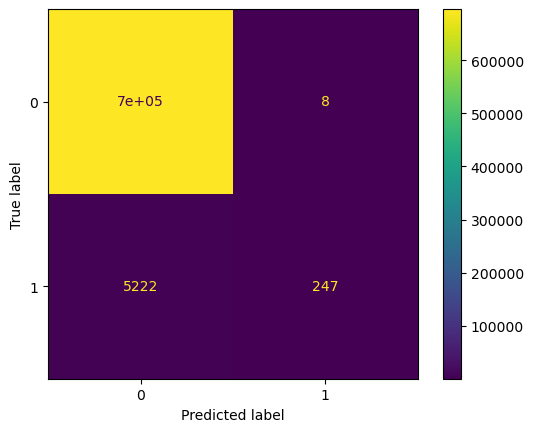

In [31]:
# Матрица ошибок с категориями
predicted_cat = model_cat_full.predict(features)

cm = confusion_matrix(target, predicted_cat, labels=model_cat_full.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat_full.classes_)
disp.plot()

plt.show()

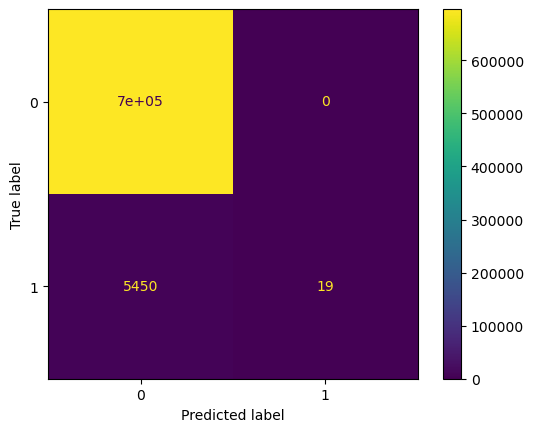

In [90]:
# Матрица ошибок без категорий
predicted_cat = model_cat_full.predict(features)

cm = confusion_matrix(target, predicted_cat, labels=model_cat.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat.classes_)
disp.plot()

plt.show()

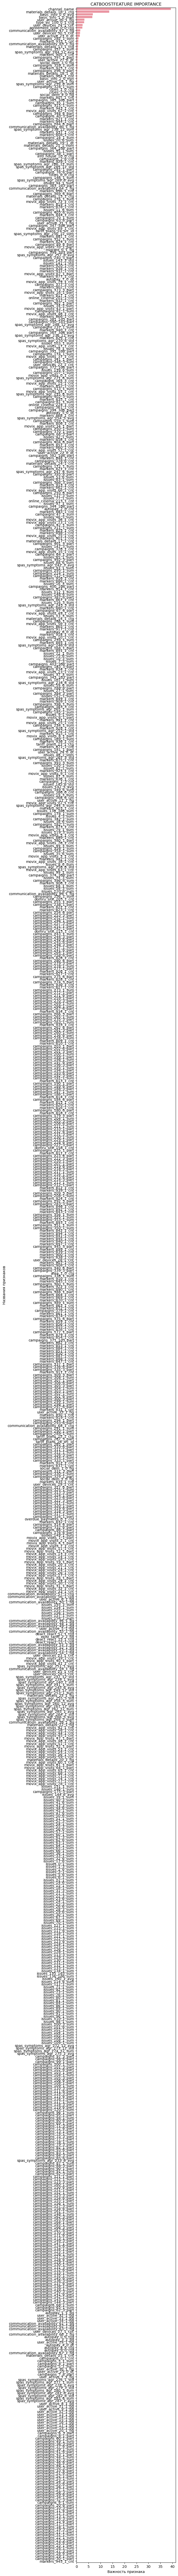

In [91]:
# Без категорий
plot_feature_importance(model_cat_full.get_feature_importance(),features.columns,'CATBOOST')

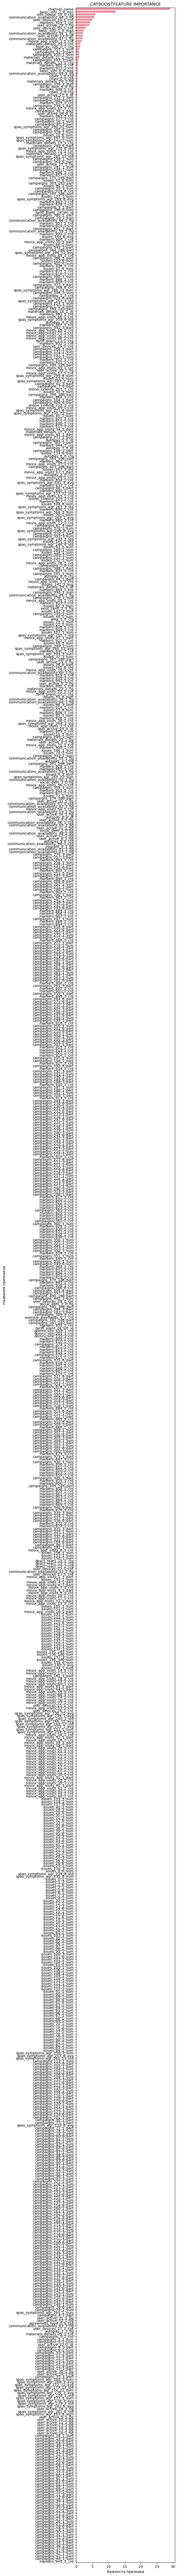

In [34]:
# С категориями
plot_feature_importance(model_cat_full.get_feature_importance(),features.columns,'CATBOOST')

In [33]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(5,130))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('Важность признака')
    plt.ylabel('Названия признаков')

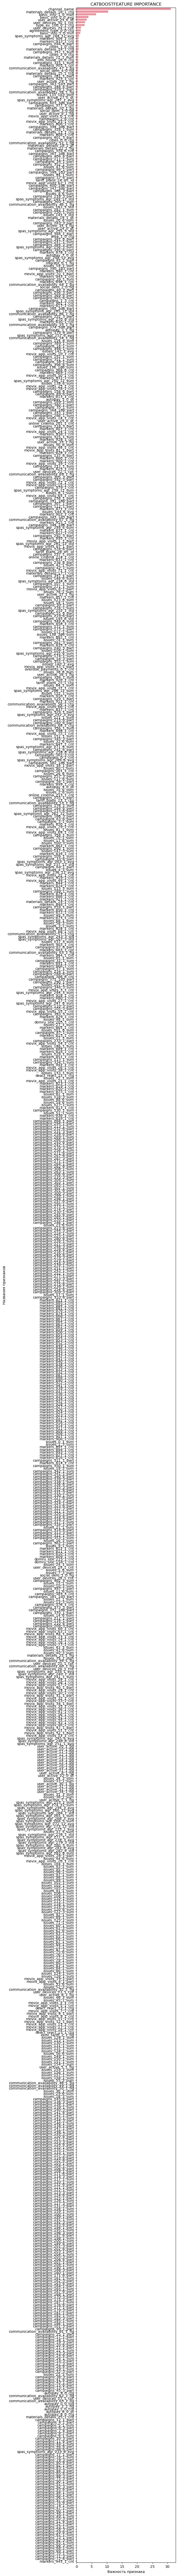

In [52]:
# Отобразим feature_importance
plot_feature_importance(model_cat.get_feature_importance(),features.columns,'CATBOOST')

In [55]:
probabilities_cat = model_cat.predict_proba(features_downsampled)[:,1]
auc_roc = roc_auc_score(target_downsampled, probabilities_cat)

print('Метрика ROC_AUC на тестовой выборке:', auc_roc)

Метрика ROC_AUC на тестовой выборке: 0.7845084321920763


In [ ]:
# Матрица ошибок
predicted_cat = model_cat.predict(features_test)

cm = confusion_matrix(target_test, predicted_cat, labels=model_cat.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat.classes_)
disp.plot()

plt.show()

In [84]:
feature_importance = np.array(model_cat.get_feature_importance())
feature_names = np.array(features.columns)
data = {'feature_names':feature_names,'feature_importance':feature_importance}
fitures_df = pd.DataFrame(data=data, dtype = np.int32)


C:\Users\ipd08\AppData\Local\Temp\ipykernel_19116\1733306396.py:4: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)
C:\Users\ipd08\AppData\Local\Temp\ipykernel_19116\1733306396.py:4: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)


In [88]:
fitures_df.sort_values(by=['feature_importance'], ascending=False).head(20)

feature_names  feature_importance
0                   channel_name                  31
187   materials_details_16_1_ctg                  10
369           basic_info_1_0_max                   6
368           basic_info_0_0_avg                   3
357          user_active_23_0_dt                   3
807        user_devices_30_1_cnt                   2
371          type_av_100_0_1_ctg                   2
370           basic_info_2_0_min                   1
373       agreement_type_0_0_ctg                   1
193        user_devices_24_1_cnt                   1
6                 issues_2_6_sum                   0
11                issues_7_3_sum                   0
10                issues_6_1_sum                   0
9                 issues_5_6_sum                   0
8                 issues_4_3_sum                   0
7                 issues_3_1_sum                   0
2    spas_symptoms_agr_234_6_std                   0
5                 issues_1_3_sum                   0
4                 issues_0_1_sum                   0
3    spas_symptoms_agr_235_6_sum                   0

In [92]:
features_downsampled_1, target_downsampled_1 = downsample(features, target, 0.02)

In [96]:
%time
#cat_features = features_train.select_dtypes(include='category').columns.to_list() - , cat_features=cat_features,\
# Построим модель CatBoostClassifier

model_cat = CatBoostClassifier(loss_function="Logloss", verbose=10,\
                               eval_metric='AUC:hints=skip_train~false',\
                               random_state=RANDOM_STATE) 

grid = {'learning_rate': [0.03, 0.1,  0.3, 0.4],
        'depth': [4, 6, ],
        'l2_leaf_reg': [1, 3, 5, 7],
        'iterations': [200] }
grid_search_result = model_cat.grid_search(grid,
                                       X=features_downsampled_1,
                                       y=target_downsampled_1,
                                       plot=True, cv=10)

CPU times: total: 0 ns
Wall time: 0 ns


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6640999	test: 0.6704670	best: 0.6704670 (0)	total: 14.4ms	remaining: 2.88s
10:	learn: 0.7180492	test: 0.7143716	best: 0.7143716 (10)	total: 159ms	remaining: 2.73s
20:	learn: 0.7284182	test: 0.7246954	best: 0.7260954 (18)	total: 307ms	remaining: 2.62s
30:	learn: 0.7325601	test: 0.7283253	best: 0.7289323 (26)	total: 450ms	remaining: 2.45s
40:	learn: 0.7361396	test: 0.7310386	best: 0.7315237 (37)	total: 590ms	remaining: 2.29s
50:	learn: 0.7382313	test: 0.7335141	best: 0.7335141 (50)	total: 732ms	remaining: 2.14s
60:	learn: 0.7398258	test: 0.7351756	best: 0.7351756 (60)	total: 887ms	remaining: 2.02s
70:	learn: 0.7413824	test: 0.7362605	best: 0.7362605 (70)	total: 1.03s	remaining: 1.87s
80:	learn: 0.7430455	test: 0.7376684	best: 0.7376684 (80)	total: 1.18s	remaining: 1.73s
90:	learn: 0.7439724	test: 0.7373835	best: 0.7376841 (81)	total: 1.32s	remaining: 1.58s
100:	learn: 0.7452630	test: 0.7376391	best: 0.7376841 (81)	total: 1.48s	remaining: 1.45s
110:	learn: 0.7469184	test: 0.73

In [94]:
feature_importance = np.array(model_cat.get_feature_importance())
feature_names = np.array(features.columns)
data = {'feature_names':feature_names,'feature_importance':feature_importance}
fitures_df = pd.DataFrame(data=data, dtype = np.int32)


C:\Users\ipd08\AppData\Local\Temp\ipykernel_19116\1733306396.py:4: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)
C:\Users\ipd08\AppData\Local\Temp\ipykernel_19116\1733306396.py:4: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)


In [95]:
fitures_df.sort_values(by=['feature_importance'], ascending=False).head(20)

feature_names  feature_importance
0                  channel_name                  19
187  materials_details_16_1_ctg                   5
368          basic_info_0_0_avg                   2
369          basic_info_1_0_max                   2
370          basic_info_2_0_min                   2
371         type_av_100_0_1_ctg                   2
807       user_devices_30_1_cnt                   2
914           markers_904_1_cnt                   1
367         info_house_10_0_ctg                   1
181              cities_1_0_ctg                   1
193       user_devices_24_1_cnt                   1
357         user_active_23_0_dt                   1
703        campaigns_311_1_part                   0
702        campaigns_310_6_part                   0
625        campaigns_233_1_part                   0
626         campaigns_234_1_sum                   0
627        campaigns_235_3_part                   0
628        campaigns_236_6_part                   0
629         campaigns_237_1_sum                   0
630        campaigns_238_1_part                   0

In [50]:
%time
cat_features = features_downsampled.select_dtypes(include='category').columns.to_list()
# Построим модель CatBoostClassifier

model_cat = CatBoostClassifier(loss_function="Logloss", verbose=10,\
                               cat_features=cat_features,\
                               eval_metric='AUC:hints=skip_train~false',\
                               random_state=RANDOM_STATE, auto_class_weights="SqrtBalanced") 

grid = {'learning_rate': [0.08, 0.1,  0.15, 0.2],
        'depth': [4],
        'l2_leaf_reg': [1, 3, 5, 7],
        'iterations': [200] }
grid_search_result = model_cat.grid_search(grid,
                                       X=features_downsampled,
                                       y=target_downsampled,
                                       plot=True, cv=10)

CPU times: total: 0 ns
Wall time: 0 ns


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6984512	test: 0.7044179	best: 0.7044179 (0)	total: 45ms	remaining: 8.96s
10:	learn: 0.7289129	test: 0.7302313	best: 0.7314467 (4)	total: 446ms	remaining: 7.67s
20:	learn: 0.7369161	test: 0.7368285	best: 0.7368367 (19)	total: 841ms	remaining: 7.17s
30:	learn: 0.7421768	test: 0.7387474	best: 0.7387474 (30)	total: 1.23s	remaining: 6.73s
40:	learn: 0.7453424	test: 0.7405148	best: 0.7405148 (40)	total: 1.67s	remaining: 6.48s
50:	learn: 0.7484500	test: 0.7414026	best: 0.7414026 (50)	total: 2.08s	remaining: 6.07s
60:	learn: 0.7512283	test: 0.7418036	best: 0.7418131 (55)	total: 2.47s	remaining: 5.62s
70:	learn: 0.7537486	test: 0.7429245	best: 0.7429245 (70)	total: 2.85s	remaining: 5.18s
80:	learn: 0.7578330	test: 0.7445574	best: 0.7445849 (79)	total: 3.32s	remaining: 4.87s
90:	learn: 0.7609936	test: 0.7452245	best: 0.7453378 (88)	total: 3.74s	remaining: 4.48s
100:	learn: 0.7642546	test: 0.7460010	best: 0.7461667 (99)	total: 4.18s	remaining: 4.1s
110:	learn: 0.7665662	test: 0.746789

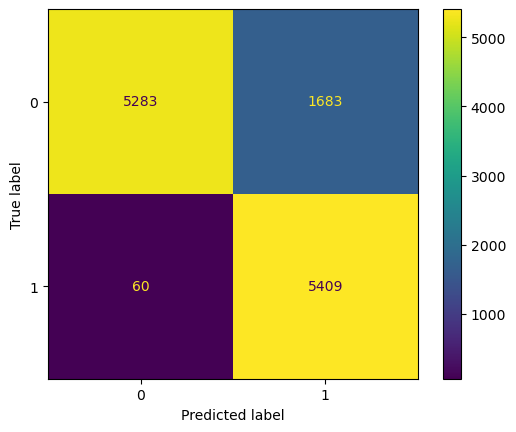

In [51]:
# Матрица ошибок
predicted_cat = model_cat.predict(features_downsampled)

cm = confusion_matrix(target_downsampled, predicted_cat, labels=model_cat.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat.classes_)
disp.plot()

plt.show()

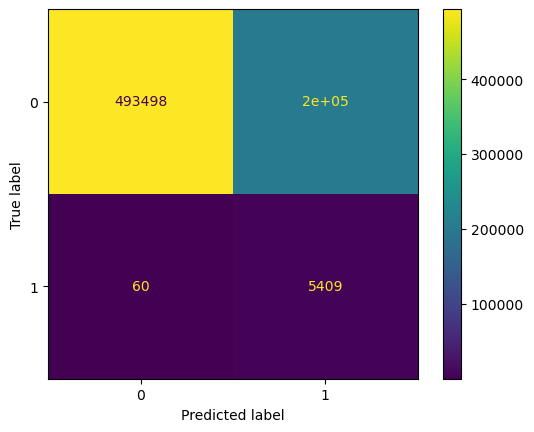

In [52]:
# Матрица ошибок
predicted_cat = model_cat.predict(features)

cm = confusion_matrix(target, predicted_cat, labels=model_cat.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat.classes_)
disp.plot()

plt.show()

In [81]:
# Выведем таблицу важных признаков
feature_importance = np.array(model_cat.get_feature_importance())
feature_names = np.array(features.columns)
data = {'feature_names':feature_names,'feature_importance':feature_importance}
fitures_df = pd.DataFrame(data=data, dtype = np.int32)
fitures_df.sort_values(by=['feature_importance'], ascending=False).head(21)

C:\Users\ipd08\AppData\Local\Temp\ipykernel_12184\209678422.py:5: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)
C:\Users\ipd08\AppData\Local\Temp\ipykernel_12184\209678422.py:5: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)


feature_names  feature_importance
0                           channel_name                  18
369                   basic_info_2_0_min                   3
186           materials_details_15_1_ctg                   2
356                  user_active_23_0_dt                   2
367                   basic_info_0_0_avg                   2
806                user_devices_30_1_cnt                   2
343                 user_active_10_1_flg                   1
775                 campaigns_384_3_part                   1
178           materials_details_13_1_ctg                   1
192                user_devices_24_1_cnt                   1
169  communication_availability_49_1_flg                   1
913                    markers_904_1_cnt                   1
917                    markers_908_1_cnt                   1
803                       cities_2_0_ctg                   1
738               campaigns_347_3d6_part                   1
185           materials_details_14_1_ctg                   1
368                   basic_info_1_0_max                   1
357                  user_active_24_0_dt                   1
370                  type_av_100_0_1_ctg                   1
366                  info_house_10_0_ctg                   1
942                    markers_933_1_cnt                   1

In [53]:
features_downsampled_2, target_downsampled_2 = downsample(features, target, 0.1)

In [54]:
%time
cat_features = features_downsampled.select_dtypes(include='category').columns.to_list()
# Построим модель CatBoostClassifier

model_cat_down2 = CatBoostClassifier(loss_function="Logloss", verbose=10,\
                               cat_features=cat_features,\
                               eval_metric='AUC:hints=skip_train~false',\
                               random_state=RANDOM_STATE, auto_class_weights="SqrtBalanced") 

grid = {'learning_rate': [0.1,  0.15, 0.17],
        'depth': [4],
        'l2_leaf_reg': [1, 3, 5, 7],
        'iterations': [200] }
grid_search_result = model_cat_down2.grid_search(grid,
                                       X=features_downsampled_2,
                                       y=target_downsampled_2,
                                       plot=True, cv=5)

CPU times: total: 0 ns
Wall time: 0 ns


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6784116	test: 0.6770183	best: 0.6770183 (0)	total: 250ms	remaining: 49.7s
10:	learn: 0.7248519	test: 0.7244801	best: 0.7244801 (10)	total: 2.57s	remaining: 44.2s
20:	learn: 0.7340631	test: 0.7328560	best: 0.7328560 (20)	total: 4.78s	remaining: 40.7s
30:	learn: 0.7384746	test: 0.7358766	best: 0.7358766 (30)	total: 7.08s	remaining: 38.6s
40:	learn: 0.7436128	test: 0.7412592	best: 0.7412592 (40)	total: 10.8s	remaining: 42s
50:	learn: 0.7481845	test: 0.7434971	best: 0.7434971 (50)	total: 13.3s	remaining: 38.9s
60:	learn: 0.7509602	test: 0.7452632	best: 0.7452632 (60)	total: 15.5s	remaining: 35.4s
70:	learn: 0.7533099	test: 0.7464830	best: 0.7464830 (70)	total: 18.4s	remaining: 33.4s
80:	learn: 0.7550097	test: 0.7472518	best: 0.7472518 (80)	total: 20.7s	remaining: 30.4s
90:	learn: 0.7571072	test: 0.7478750	best: 0.7478996 (88)	total: 23.4s	remaining: 28s
100:	learn: 0.7593350	test: 0.7486243	best: 0.7486243 (100)	total: 25.9s	remaining: 25.4s
110:	learn: 0.7616899	test: 0.749027

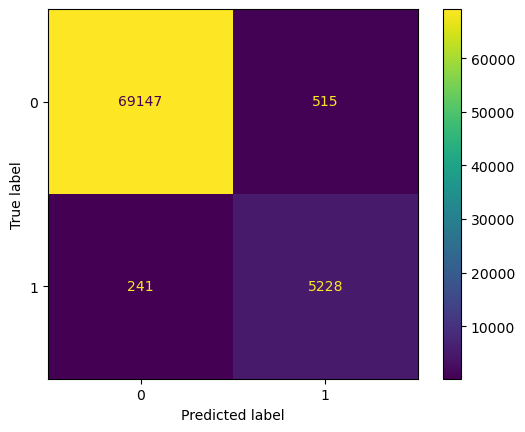

In [56]:
# Матрица ошибок
predicted_cat = model_cat_down2.predict(features_downsampled_2)

cm = confusion_matrix(target_downsampled_2, predicted_cat, labels=model_cat_down2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat_down2.classes_)
disp.plot()

plt.show()

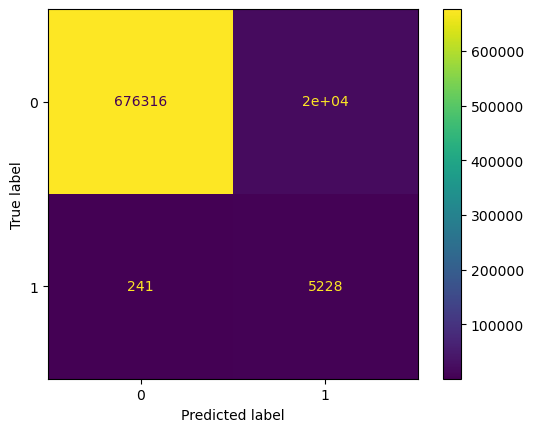

In [57]:
# Матрица ошибок
predicted_cat = model_cat_down2.predict(features)

cm = confusion_matrix(target, predicted_cat, labels=model_cat_down2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat_down2.classes_)
disp.plot()

plt.show()

In [85]:
# Выведем таблицу важных признаков
feature_importance = np.array(model_cat_down2.get_feature_importance())
feature_names = np.array(features.columns)
data = {'feature_names':feature_names,'feature_importance':feature_importance}
fitures_df = pd.DataFrame(data=data, dtype = np.int32)
fitures_df.sort_values(by=['feature_importance'], ascending=False).head(21)


C:\Users\ipd08\AppData\Local\Temp\ipykernel_12184\2747796237.py:5: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)
C:\Users\ipd08\AppData\Local\Temp\ipykernel_12184\2747796237.py:5: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  fitures_df = pd.DataFrame(data=data, dtype = np.int32)


feature_names  feature_importance
0                           channel_name                  19
368                   basic_info_1_0_max                   8
186           materials_details_15_1_ctg                   3
806                user_devices_30_1_cnt                   3
369                   basic_info_2_0_min                   2
942                    markers_933_1_cnt                   1
185           materials_details_14_1_ctg                   1
192                user_devices_24_1_cnt                   1
164  communication_availability_47_1_flg                   1
913                    markers_904_1_cnt                   1
343                 user_active_10_1_flg                   1
372               agreement_type_0_0_ctg                   1
803                       cities_2_0_ctg                   1
370                  type_av_100_0_1_ctg                   1
356                  user_active_23_0_dt                   1
367                   basic_info_0_0_avg                   1
366                  info_house_10_0_ctg                   1
641                  campaigns_250_1_sum                   0
608                  campaigns_217_1_sum                   0
634                  campaigns_243_1_sum                   0
635                 campaigns_244_3_part                   0

In [88]:
features_for_test = fitures_df.sort_values(by=['feature_importance'], ascending=False).head(17)
features_for_test_1 = features_for_test['feature_names'].to_list()
features_for_test_1

['channel_name',
 'basic_info_1_0_max',
 'materials_details_15_1_ctg',
 'user_devices_30_1_cnt',
 'basic_info_2_0_min',
 'markers_933_1_cnt',
 'materials_details_14_1_ctg',
 'user_devices_24_1_cnt',
 'communication_availability_47_1_flg',
 'markers_904_1_cnt',
 'user_active_10_1_flg',
 'agreement_type_0_0_ctg',
 'cities_2_0_ctg',
 'type_av_100_0_1_ctg',
 'user_active_23_0_dt',
 'basic_info_0_0_avg',
 'info_house_10_0_ctg']

In [59]:
probabilities_cat = model_cat_down2.predict_proba(features)[:,1]
auc_roc = roc_auc_score(target, probabilities_cat)

print('Метрика ROC_AUC на обучающей выборке:', auc_roc)

Метрика ROC_AUC на обучающей выборке: 0.9914963743935643


In [60]:
# Средняя оценка на кросс-валидации

result_cat = pd.DataFrame(grid_search_result)
np.mean(result_cat.T['test-AUC-mean']['cv_results'])

0.747375475432731

In [77]:
features_for_test = fitures_df.sort_values(by=['feature_importance'], ascending=False).head(21)
features_for_test = features_for_test['feature_names'].to_list()
features_for_test

['channel_name',
 'basic_info_2_0_min',
 'materials_details_15_1_ctg',
 'user_active_23_0_dt',
 'basic_info_0_0_avg',
 'user_devices_30_1_cnt',
 'user_active_10_1_flg',
 'campaigns_384_3_part',
 'materials_details_13_1_ctg',
 'user_devices_24_1_cnt',
 'communication_availability_49_1_flg',
 'markers_904_1_cnt',
 'markers_908_1_cnt',
 'cities_2_0_ctg',
 'campaigns_347_3d6_part',
 'materials_details_14_1_ctg',
 'basic_info_1_0_max',
 'user_active_24_0_dt',
 'type_av_100_0_1_ctg',
 'info_house_10_0_ctg',
 'markers_933_1_cnt']

In [78]:
# Сформируем списко признаков

#a = ['target']
#b = features_for_test

#features_test = [a + b][0]
features_test = features_for_test

In [79]:
# Загрузим признаки
df_features_test = pd.read_parquet('features_oot.parquet', engine='fastparquet', columns=features_test)

In [101]:
a = ['user_active_23_0_dt', 
'user_devices_30_1_cnt', 
'agreement_type_0_0_ctg',
'channel_name',
 'basic_info_2_0_min',
 'materials_details_15_1_ctg',
 'user_active_23_0_dt',
 'basic_info_0_0_avg',
 'user_devices_30_1_cnt',
 'user_active_10_1_flg',
 'campaigns_384_3_part',
 'materials_details_13_1_ctg',
 'user_devices_24_1_cnt',
 'communication_availability_49_1_flg',
 'markers_904_1_cnt',
 'markers_908_1_cnt',
 'cities_2_0_ctg',
 'campaigns_347_3d6_part',
 'materials_details_14_1_ctg',
 'basic_info_1_0_max',
 'user_active_24_0_dt',
 'type_av_100_0_1_ctg',
 'info_house_10_0_ctg',
 'markers_933_1_cnt']


In [102]:

features_new = [a for a in a if a not in features_for_test_1]
features_new = features_new + features_for_test_1
features_new

['campaigns_384_3_part',
 'materials_details_13_1_ctg',
 'communication_availability_49_1_flg',
 'markers_908_1_cnt',
 'campaigns_347_3d6_part',
 'user_active_24_0_dt',
 'channel_name',
 'basic_info_1_0_max',
 'materials_details_15_1_ctg',
 'user_devices_30_1_cnt',
 'basic_info_2_0_min',
 'markers_933_1_cnt',
 'materials_details_14_1_ctg',
 'user_devices_24_1_cnt',
 'communication_availability_47_1_flg',
 'markers_904_1_cnt',
 'user_active_10_1_flg',
 'agreement_type_0_0_ctg',
 'cities_2_0_ctg',
 'type_av_100_0_1_ctg',
 'user_active_23_0_dt',
 'basic_info_0_0_avg',
 'info_house_10_0_ctg']

<h2>List of true features</h2>

In [103]:
# Разделим дата сет

df_features_new = df_features.drop(['target', 'materials_details_16_1_ctg'], axis=1)
df_target_new = df_features['target']
df_features_new = df_features_new[features_new] 
df_features_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702086 entries, 0 to 702085
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   campaigns_384_3_part                 692685 non-null  float64 
 1   materials_details_13_1_ctg           702086 non-null  category
 2   communication_availability_49_1_flg  702086 non-null  category
 3   markers_908_1_cnt                    671264 non-null  float64 
 4   campaigns_347_3d6_part               692685 non-null  float64 
 5   user_active_24_0_dt                  695911 non-null  float64 
 6   channel_name                         702086 non-null  category
 7   basic_info_1_0_max                   661018 non-null  float64 
 8   materials_details_15_1_ctg           702086 non-null  category
 9   user_devices_30_1_cnt                702086 non-null  float64 
 10  basic_info_2_0_min                   661018 non-null  float64 
 11  

In [106]:
features_downsampled_3, target_downsampled_3 = downsample(df_features_new, df_target_new, 0.05)

In [112]:
%time
cat_features = features_downsampled_3.select_dtypes(include='category').columns.to_list()
# Построим модель CatBoostClassifier

model_cat_full_last = CatBoostClassifier(loss_function="Logloss", verbose=10,\
                               cat_features=cat_features,\
                               eval_metric='AUC:hints=skip_train~false',\
                               random_state=RANDOM_STATE) 

grid = {'learning_rate': [0.1, 0.17],
        'depth': [8],
        'l2_leaf_reg': [ 5],
        'iterations': [400],
         'auto_class_weights': ['Balanced']}
grid_search_result_full_last = model_cat_full_last.grid_search(grid,
                                       X=features_downsampled_3,
                                       y=target_downsampled_3,
                                       plot=True, cv=10)

CPU times: total: 0 ns
Wall time: 0 ns


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7202839	test: 0.7336147	best: 0.7336147 (0)	total: 163ms	remaining: 1m 4s
10:	learn: 0.7366133	test: 0.7446915	best: 0.7446915 (10)	total: 1.38s	remaining: 48.9s
20:	learn: 0.7463075	test: 0.7511363	best: 0.7511363 (20)	total: 2.64s	remaining: 47.7s
30:	learn: 0.7553588	test: 0.7571631	best: 0.7571631 (30)	total: 4.08s	remaining: 48.6s
40:	learn: 0.7616799	test: 0.7589476	best: 0.7589476 (40)	total: 5.46s	remaining: 47.8s
50:	learn: 0.7659093	test: 0.7601954	best: 0.7601986 (49)	total: 6.75s	remaining: 46.2s
60:	learn: 0.7694912	test: 0.7612599	best: 0.7612599 (60)	total: 8.05s	remaining: 44.8s
70:	learn: 0.7751151	test: 0.7619521	best: 0.7619521 (70)	total: 9.46s	remaining: 43.8s
80:	learn: 0.7808678	test: 0.7622169	best: 0.7622169 (80)	total: 10.9s	remaining: 42.9s
90:	learn: 0.7838365	test: 0.7626945	best: 0.7626945 (89)	total: 12.2s	remaining: 41.3s
100:	learn: 0.7895494	test: 0.7635105	best: 0.7636065 (99)	total: 13.4s	remaining: 39.8s
110:	learn: 0.7959614	test: 0.764

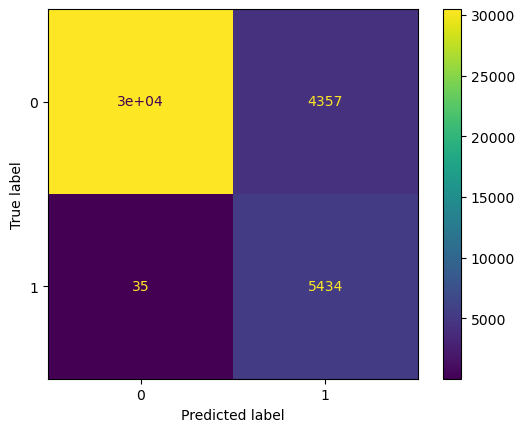

In [116]:
# Матрица ошибок
predicted_cat = model_cat_full_last.predict(features_downsampled_3)

cm = confusion_matrix(target_downsampled_3, predicted_cat, labels=model_cat_full_last.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat_full_last.classes_)
disp.plot()

plt.show()

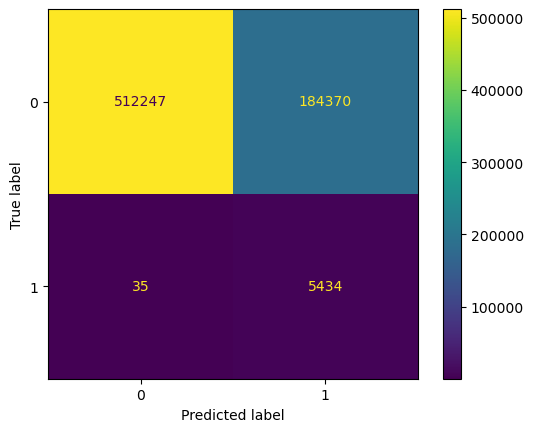

In [117]:
# Матрица ошибок
predicted_cat = model_cat_full_last.predict(df_features_new)

cm = confusion_matrix(df_target_new, predicted_cat, labels=model_cat_full_last.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat_full_last.classes_)
disp.plot()

plt.show()